# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Parte 3: Regresión

__Número de grupo: 17__

__Nombres de los estudiantes: David del Cerro Domínguez y Sergio Ramos Mesa__

En este notebook trabajaremos con una colección de datos de alquileres de Airbnb en Amsterdam. El objetivo de este problema es entrenar una red neuronal capaz de predecir el precio del alojamiento a partir de un conjunto de características.

## 1) Descripción de los datos

Carga el fichero de datos `airbnb.csv` en un dataframe. Describe el conjunto de datos y trata de interpretar el significado de cada una de las variables. Estudia la distribución de precios.

In [1]:
RANDOM_STATE = 33

import pandas as pd
import numpy as np

df = pd.read_csv('airbnb.csv')
df.describe()

,accommodates,bathrooms,bedrooms,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,distance_centre,instant_bookable,entire_home,private_room,shared_room,price
count,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000
mean,2.880317,1.116215,1.390919,1.499333,3.372316,52.365312,4.889033,2.885051,17.797440,2.998582,0.155954,0.777170,0.218562,0.004267,130.050273
std,1.298492,0.343442,0.839649,0.940643,11.203593,0.015765,0.035010,7.252271,34.766613,1.610995,0.362824,0.416159,0.413285,0.065187,63.820328
min,1.000000,0.000000,0.000000,1.000000,0.000000,52.290308,4.753513,1.000000,0.000000,0.115801,0.000000,0.000000,0.000000,0.000000,19.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,52.355582,4.864839,2.000000,2.000000,1.948924,0.000000,1.000000,0.000000,0.000000,89.000000
50%,2.000000,1.000000,1.000000,1.000000,1.000000,52.364960,4.886370,2.000000,7.000000,2.841338,0.000000,1.000000,0.000000,0.000000,115.000000
75%,4.000000,1.000000,2.000000,2.000000,1.000000,52.374805,4.907953,3.000000,18.000000,3.577086,0.000000,1.000000,0.000000,0.000000,150.000000
max,17.000000,8.000000,10.000000,16.000000,106.000000,52.426224,5.027689,523.000000,496.000000,11.842162,1.000000,1.000000,1.000000,1.000000,440.000000


1. Accomodates : Número de personas para el que dispone el alojamiento.
2. Bathrooms: Número de baños del alojamiento.
3. Bedrooms: Número de habitaciones del alojamiento.
4. Guest_included: Número de personas que incluye el pago del alojamiento, personas extras hay que pagar un extra.
5. host_listing_count: Número de alojamientos que ofrece el propietario.
6. Latitude: Latitud del alojamiento.
7. Longitude: Longitud(coordenada) del alojamiento.
8. Minimum_nights: Mínimo de noches requeridas para alquilar el alojamiento.
9. Number_of_reviews: Numero de reseñas del alojamiento.
10. Distance_centre: Distancia al centro en metros.
11. Instant_bookable: Indica si un alojamiento esta disponible para reservearlo instantaneamente.
12. Entire_home: Indica si el alojamiento está a tu completo uso, o si parte de él está en uso por otra persona.
13. Price: Precio del alojamiento.

<AxesSubplot:>

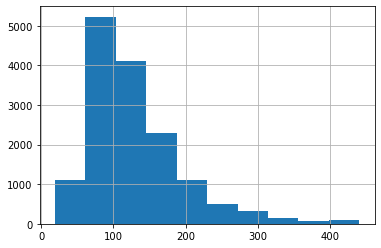

In [2]:
##Distrubución de precios##
df['price'].hist()

## 2) Selección de variables

Calcula los coeficientes de correlación de Pearson entre la variable de salida y el resto de variables. Crea un nuevo dataframe que contenga el precio y, además, las variables que estén relacionadas con él por un valor de correlacción de al menos 0.2 (de forma directa o inversa).

In [3]:
# coeficientes de correlación entre pares de variables
# Valor cercano a 1 indica correlación directa
# Valor cercano a -1 indica correlación inversa
# Valor cercano a 0 indica no correlación
correl = df.corr(method='pearson')
correl['price']


accommodates           0.552183
bathrooms              0.283759
bedrooms               0.517237
guests_included        0.338739
host_listings_count    0.109141
latitude               0.027922
longitude              0.035887
minimum_nights         0.007708
number_of_reviews     -0.088437
distance_centre       -0.204698
instant_bookable      -0.004410
entire_home            0.361313
private_room          -0.357184
shared_room           -0.042109
price                  1.000000
Name: price, dtype: float64

In [4]:
##Encontramos las variables con mayor correlación##
correl[abs(correl['price']) > 0.2]['price']

accommodates       0.552183
bathrooms          0.283759
bedrooms           0.517237
guests_included    0.338739
distance_centre   -0.204698
entire_home        0.361313
private_room      -0.357184
price              1.000000
Name: price, dtype: float64

Como podemos observar, el coeficiente de correlación de Pearson, nos da las variables que más relacionadas están con el precio. En este caso nos encontramos que las más proporcionalmente relacionadas con precio son "accommodates" y "bedrooms" e inversamente relacionadas nos encontramos con "private_room"

In [5]:
##Nuevo dataframe##
dfCorrel = df[['accommodates','bathrooms','bedrooms','guests_included',
               'distance_centre','entire_home','private_room']]
##Dataframe del precio##
price = df[['price']]

## 3) Normalización

Decide si debes o no normalizar los datos. En caso afirmativo elige razonadamente entre escalarlos o estandarizarlos.

Si decides escalar los datos deberás crear dos `scalers` distintos, uno para el array con la descripción de los pisos y otro para el array con el precio. Lo hacemos de este modo porque así podremos desescalar las predicciones más fácilmente.

In [6]:
from sklearn.preprocessing import StandardScaler

# Transformamos las variables de entrada
scaler_x = StandardScaler()
scaler_x.fit(dfCorrel)
df_scaled=scaler_x.transform(dfCorrel)

# Y también transformamos la variable de salida
scaler_y = StandardScaler()
scaler_y.fit(price.to_numpy().reshape(-1, 1)) # Como es una sola variable es necesario ponerlo en modo columna
price_scaled=scaler_y.transform(price.to_numpy().reshape(-1, 1))

## 4) Entrenamiento y selección

Crea dos redes neuronales de tipo Perceptrón Multicapa:
- La primera con una capa oculta de 200 neuronas
- La segunda con dos capas ocultas cada una de 100 neuronas

Pinta la curva de aprendizaje para cada red variando el parámetro `alpha` que controla el coeficiente de regularización L2 y determina el valor óptimo usando validación cruzada. Asegúrate de que no salen warnings indicando que no se ha alcanzado la convergencia durante el entrenamiento (basta con poner un número de max_iter suficientemente grande).

¿Alguna de las dos redes domina a la otra? ¿Por qué crees que se producen las diferencias?

In [7]:
#Imports
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

cv_scores_mean=[]
cv_scores_std=[]

# Entrenar y validar distintas configuraciones
regul_param_range = 10.0 ** -np.arange(1, 7) # [0.1, 0.01, ..., 0.0000001]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp=MLPRegressor(hidden_layer_sizes=(200, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, df_scaled, price_scaled.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())

cv_scores_mean, cv_scores_std

([-0.5030447927018817,
  -0.5041137591488916,
  -0.5039453817563826,
  -0.5040936307319178,
  -0.5034269753130475,
  -0.5044163370608322],
 [0.018362769961343197,
  0.023466265298919795,
  0.02253861931067291,
  0.02215124715029894,
  0.02164010928979531,
  0.02118417777831183])

In [8]:
cv_scores_mean=[]
cv_scores_std=[]

# Entrenar y validar distintas configuraciones
regul_param_range = 10.0 ** -np.arange(1, 7) # [0.1, 0.01, ..., 0.0000001]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp=MLPRegressor(hidden_layer_sizes=(100, 2), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, df_scaled, price_scaled.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())

cv_scores_mean, cv_scores_std

([-0.5013885727604814,
  -0.5062163535276039,
  -0.5089328181599859,
  -0.5088145661301582,
  -0.5091858223353334,
  -0.5089555605546751],
 [0.019288200505991355,
  0.021343331947269985,
  0.021966048140078794,
  0.02278102841526086,
  0.02316228642959421,
  0.02309980898249046])

## 5) Medición del error

Elige la mejor configuración del apartado anterior y usa la función `cross_val_predict` para realizar una predicción del valor de todos los establecimientos usando validación cruzada. ¿Cuál es el error medio del modelo en euros? ¿Crees que el modelo es suficientemente bueno?

Pinta la distribución del error en euros y el diagrama de dispersión de la predicción frente al valor real. ¿El modelo comete los mismos tipos de errores en establecimientos de distintos precios? ¿Por qué crees que se producen esos errores?

In [9]:
from sklearn.model_selection import cross_val_predict

# Creamos el clasificador
regul_param=0.1
mlp = MLPRegressor(hidden_layer_sizes=(200, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)
    
# estimamos 
predicts_scaled = cross_val_predict(mlp, df_scaled, price_scaled.ravel(), cv=10)

# desescalamos las predicciones para que estén en la escala original
predicts=scaler_y.inverse_transform(predicts_scaled)

In [10]:
errors = np.abs(df.price - predicts) # error en cada ejemplo
mean_error = np.mean(errors)
std_error = np.std(errors)
mean_price = np.mean(df['price'])

print('Error medio:', mean_error)
print('Desviación típica:', std_error)
print('Error medio en %:', mean_error/mean_price*100)

Error medio: 31.715919731243545
Desviación típica: 32.35554246569234
Error medio en %: 24.387430267880376


Eligiendo el modelo más apropiado obtenido en las ejecuciones de ambas redes neuronales anteriores, obtenemos un error medio de 31 euros
, haciendo que el porcentaje de error sea de un 24 %. Por su parte la desviación se situa en los 32 euros.
El modelo que obtenemos no es suficientemente bueno debido principalmente al error medio del 24 por ciento que comete.

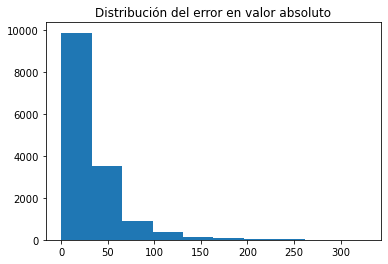

In [12]:
import matplotlib.pyplot as plt 
# Dibujamos el histograma de los errores
fig1 = plt.figure()
ax1 = plt.axes()
ax1.hist(errors)

plt.title('Distribución del error en valor absoluto')
plt.show()

Como podemos observar en la gráfica, la gran mayoría de error se encuentra en torno al valor 0 y 25 euros de error. Aunque tambíen hay un valor significativo de error entre 25 y 65 euros.

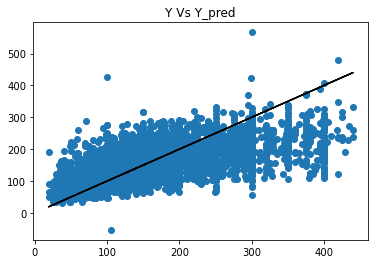

In [16]:
fig2 = plt.figure()
ax2 = plt.axes()

# dibujamos los errores: la distancia a la recta indica el nivel de error
ax2.scatter(df.price, predicts) 
# Pintamos la referencia de la predicción perfecta
ax2.plot(df.price, df.price, color='k') 

plt.title('Y Vs Y_pred')
plt.show()

Como podemos observar en el gráfico anterior que dibuja los errores respeto a la predicción perfecta, podemos observar que tipo de errores se cometen y donde son mayores. Podemos observar que para valores altos, el modelo predice precios superiores a lo que son realmente, pero para el resto de datos podemos observar que la predicción perfecta se mantiene en medio. Ajustando más o menos bien esos datos. Los errores en valores altos se comenten debido a que hay menor número de datos en esos intervalos de precio, haciendo que para la red neuronal, pese más los prcios menores puesto que hay un gran número de muestras. 

